# Analyse et concepts du Nurikabe
Analyse fait avec un notebook Jupyter.  
Basé sur la thèse de Bachelor de *Johan Groenen*  
Leiden Institute of Advanced Computer Science (LIACS)  
publié le 17 septembre, 2008

## Abstract
Le Nurikabe est un jeu joué sur une grille $m \times n$. Le but est de determiner pour chaque
cellule si celle-ci est noir ou blanc.

## Introduction
Ce genre de puzzles sont étudiés en sciences informatiques dans le domaine de l'*intelligence artificiel*.

## Notations et Concepts
Dans cette section nous allons définir la *Grille Nurikabe* et ensuite nous allons introduire le concepte de *Puzzle Nurikabe*.

### Représentation de la grille Nurikabe sous forme de graphe
Une *Grille Nurikabe* $m \times n$ est définie comme un graphe non-directionnel $G = (V,E)$ avec $V$ étant l'ensemble des sommets et $E$ étant l'ensemble des arêtes du graphe.

$$ V = \{(i, j)|i \in \{1, ..., m\}, j \in \{1, ..., n\}\} $$

$$ E = \{(a, b)|a, b \in V, adj(a, b)\} $$


## Représentation du Nurikabe en python

In [11]:
import numpy as np

In [12]:
P = np.array([[0, 0, 0, 0, 0],
              [6, 0, 2, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 2, 0, 2],
              [0, 0, 0, 0, 0]])

In [13]:
print(P)

[[0 0 0 0 0]
 [6 0 2 0 0]
 [0 0 0 0 0]
 [0 0 2 0 2]
 [0 0 0 0 0]]


Fonction indiquant l'adjacence de deux cellules

In [14]:
def adj(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) == 1

In [15]:
adj((0, 0), (0, 1))

True

In [16]:
adj((0, 0), (0, 2))

False

Comment trouver l'indice des pivots

In [17]:
np.nonzero(P)

(array([1, 1, 3, 3]), array([0, 2, 2, 4]))

In [18]:
 np.transpose(np.nonzero(P))

array([[1, 0],
       [1, 2],
       [3, 2],
       [3, 4]])

In [19]:
np.transpose(np.nonzero(P))

array([[1, 0],
       [1, 2],
       [3, 2],
       [3, 4]])

Fonction qui retourne les indices des pivots

In [20]:
def pivot_index(P):
    return  np.transpose(np.nonzero(P))

In [21]:
pivot_index(P)

array([[1, 0],
       [1, 2],
       [3, 2],
       [3, 4]])

Fonction qui returne les valeurs des pivots

In [26]:
def pivot_value(P):
    values = []
    for (i, j) in pivot_index(P):
        values.append(P[i, j])
    
    return values

In [29]:
pivot_value(P)

[6, 2, 2, 2]

## Méthode de solution

Enumérer toutes les combinaisons possibles d'un Nurikabe donne
$ 2^{m \times n} $ possibilités.
Par exemple pour le nurikabe ci-dessous, nous obtenons : 

In [30]:
P2 = np.array([[0, 0, 0, 0, 0, 0, 0, 5, 0, 2],
               [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 4, 0, 0, 2, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
               [0, 4, 0, 0, 0, 4, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 3, 0, 0, 3, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 1, 0, 3, 0, 3]])

In [31]:
P2.shape

(10, 10)

In [32]:
n, m = P2.shape

In [33]:
2**(n*m)

1267650600228229401496703205376

Ce nombre correspond à toutes les combinaisons possibles d'un code binaire de 100 bits.

## Les pivots
Fonction qui retourne le nombre de pivots.

In [34]:
np.count_nonzero(P2)

15

In [35]:
def pivot_nbr(P):
    return np.count_nonzero(P)

In [36]:
pivot_nbr(P2)

15

In [37]:
def pivot_sum(P):
    return np.sum(P)

In [38]:
pivot_sum(P)

12

Puisque le nombre de cellules blanches est égal à la somme des pivots, il faut compter le nombre de permutations possible.


$$ {m \times n \choose N} =\frac{(m \times n)!}{(m \times n -N)! \times N!} $$

In [39]:
n, m = P2.shape
p = pivot_nbr(P2) # number of pivots
N = pivot_sum(P2) # sum of pivots
print(n, m, p, N)

10 10 15 44


Par exemple, pour la grille $P2$ de taille $10 \times 10$ (44 cellules blanches, 15 pivots), le nombre de possibilité à essayer serait :

In [40]:
import math

perm = math.factorial(m*n - p)/(math.factorial(m*n - N) * math.factorial(N - p))
print(perm)

4.481210445054733e+22


Si l'on voudrait calculer toutes les possibilités avec un processeur de 10 GHz, il faudrait :

In [41]:
annees = (perm / 10**10) / 60 / 60 / 24 / 365
print(int(annees), "ans")

142098 ans


## Trouver les voisins d'une cellule

In [99]:
def neighbors(A, a):
    n, m = A.shape
    i, j = a
    res = []
    
    if i > 0:
        res.append((i-1, j))
    if i < n-1:
        res.append((i+1, j))
    if j > 0:
        res.append((i, j-1))
    if j < m-1:
        res.append((i, j+1))
    return res

In [45]:
neighbors(A, (0, 0))

[(1, 0), (0, 1)]

In [46]:
neighbors(A, (0, 5))

[(1, 5), (0, 4), (0, 6)]

In [47]:
neighbors(A, (2, 5))

[(1, 5), (3, 5), (2, 4), (2, 6)]

### Distance entre deux cellules

In [48]:
def dist(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

In [49]:
dist((1, 1), (2, 3)), dist((1, 1), (1, 1)), dist((10, 10), (10, 9))

(3, 0, 1)

## Trouver les cellules qui sont entre deux pivots

In [50]:
def between_pivots(P):
    n, m = P.shape
    res = []
    for i in range(n):
        for j in range(m-2):
            if P[i, j] and P[i, j+2]:
                res.append((i, j+1))
    for j in range(m):
        for i in range(n-2):
            if P[i, j] and P[i+2, j]:
                res.append((i+1, j))           
    return res

In [51]:
between_pivots(P)

[(1, 1), (3, 3), (2, 2)]

In [52]:
between_pivots(P2)

[(0, 8), (9, 6), (9, 8), (3, 1)]

## Trouver les cellules en diagonale entre deux pivots

In [53]:
def around_pivots(P):
    n, m = P.shape
    res = []
    for i in range(n-1):
        for j in range(m-1):
            if P[i, j] and P[i+1, j+1]:
                res.extend([(i, j+1), (i+1, j)])
    for i in range(n-1):
        for j in range(m-1):
            if P[i, j+1] and P[i+1, j]:
                res.extend([(i, j), (i+1, j+1)])       
    return res

In [54]:
around_pivots(P2)

[(1, 1), (2, 0), (8, 2), (9, 1), (8, 5), (9, 4), (3, 5), (4, 6)]

In [55]:
black = between_pivots(P2)
black.extend(around_pivots(P2))
black

[(0, 8),
 (9, 6),
 (9, 8),
 (3, 1),
 (1, 1),
 (2, 0),
 (8, 2),
 (9, 1),
 (8, 5),
 (9, 4),
 (3, 5),
 (4, 6)]

## Solution

In [56]:
n, m = P2.shape
S2 = np.zeros(P2.shape, dtype='int')
for x in pivot_index(P2):
    S2[tuple(x)] = 1
for x in black:
    S2[x] = -1
S2

array([[ 0,  0,  0,  0,  0,  0,  0,  1, -1,  1],
       [ 1, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -1,  0,  1, -1,  0,  0,  0,  0],
       [ 0, -1,  1,  0, -1,  1, -1,  1, -1,  1]])

# Afficher un graphe avec Matplotlib
La bibliothèque matplotlib permet d'afficher des graphes et d'images.

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

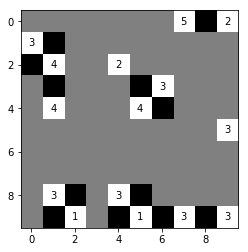

In [151]:
plt.imshow(S2, cmap='gray')
#plt.colorbar()
for x in pivot_index(P2):
    i, j = x
    p = P2[i, j]
    plt.text(j, i, p, ha="center", va="center")

Analyze all neighbors

In [103]:
for p in pivot_index(P2):
    print(neighbors(P2, p))
#    for n in neighbors(P2, p):
#        if S2[n] == 0:
#             print(n)

[(1, 7), (0, 6), (0, 8)]
[(1, 9), (0, 8)]
[(0, 0), (2, 0), (1, 1)]
[(1, 1), (3, 1), (2, 0), (2, 2)]
[(1, 4), (3, 4), (2, 3), (2, 5)]
[(2, 6), (4, 6), (3, 5), (3, 7)]
[(3, 1), (5, 1), (4, 0), (4, 2)]
[(3, 5), (5, 5), (4, 4), (4, 6)]
[(4, 9), (6, 9), (5, 8)]
[(7, 1), (9, 1), (8, 0), (8, 2)]
[(7, 4), (9, 4), (8, 3), (8, 5)]
[(8, 2), (9, 1), (9, 3)]
[(8, 5), (9, 4), (9, 6)]
[(8, 7), (9, 6), (9, 8)]
[(8, 9), (9, 8)]


In [61]:
n, m = P.shape
S = np.zeros(P.shape, dtype='int')
for x in pivot_index(P):
    S[tuple(x)] = 1
black = between_pivots(P)
black.extend(around_pivots(P))
for x in black:
    S[x] = -1
S

array([[ 0,  0,  0,  0,  0],
       [ 1, -1,  1,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  1, -1,  1],
       [ 0,  0,  0,  0,  0]])

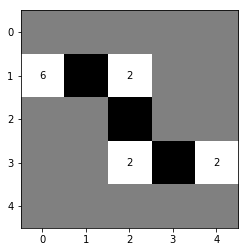

In [62]:
plt.imshow(S, cmap='gray')
#plt.colorbar()
for x in pivot_index(P):
    i, j = x
    p = P[i, j]
    plt.text(j, i, p, ha="center", va="center")

# Programmation orienté objet

In [63]:
class Nurikabe:
    def __init__(self, table):
        self.P = np.array(table) # puzzle
        self.n = self.P.shape[0]
        self.m = self.P.shape[1]
        
        self.pivots = [tuple(x) for x in np.transpose(np.nonzero(self.P))]
        self.pivot_values = [self.P[x] for x in self.pivots]
        
        self.S = np.zeros(self.P.shape, dtype='int')
        for x in self.pivots:
            self.S[x] = 1
            
        self.between_pivots()
            
    def between_pivots(self):
        P = self.P
        n, m = P.shape
        
        # a cell between two horizontal pivots is black
        for i in range(n):
            for j in range(m-2):
                if self.P[i, j] and self.P[i, j+2]:
                    self.S[i, j+1] = -1
                    
        # a cell between two vertical pivots is black
        for j in range(m):
            for i in range(n-2):
                if P[i, j] and P[i+2, j]:
                    self.S[(i+1, j)] = -1           
    
        # the two cells around two diagonal pivots are black
        for i in range(n-1):
            for j in range(m-1):
                if P[i, j] and P[i+1, j+1]:
                    self.S[(i, j+1)] = -1
                    self.S[(i+1, j)] = -1
                    
        for i in range(n-1):
            for j in range(m-1):
                if P[i, j+1] and P[i+1, j]:
                    self.S[(i, j)] = -1
                    self.S[(i+1, j+1)] = -1
                    
    def neighbors(self, a):
        i, j = a
        res = []

        if i > 0:
            res.append((i-1, j))
        if i < self.n-1:
            res.append((i+1, j))
        if j > 0:
            res.append((i, j-1))
        if j < self.m-1:
            res.append((i, j+1))
        return res
                    
    def show(self):
        plt.imshow(self.S, cmap='gray')
        for x in self.pivots:
            i, j = x
            p = self.P[x]
            plt.text(j, i, p, ha="center", va="center")

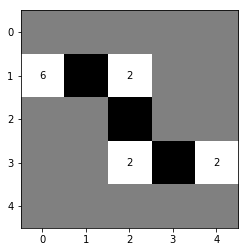

In [64]:
N1 = Nurikabe([ [0, 0, 0, 0, 0],
                [6, 0, 2, 0, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 2, 0, 2],
                [0, 0, 0, 0, 0]])
N1.show()

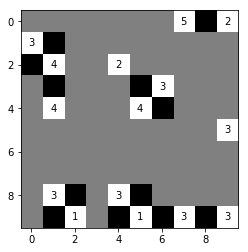

In [65]:
N2 = Nurikabe([[0, 0, 0, 0, 0, 0, 0, 5, 0, 2],
               [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 4, 0, 0, 2, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
               [0, 4, 0, 0, 0, 4, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 3, 0, 0, 3, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 1, 0, 3, 0, 3]])
N2.show()

# Génération des puzzles
On pourrait utiliser une approche de force brute et générer toutes les combinaisons possible. Un nurikabe est representé alors comme un code binare de $2^{m n}$ bits. On represente une cellule blanche par un 0 et une cellule noire par un 1.

Voici toutes les codes pour un puzzle de $2 \times 3$.

In [140]:
n, m = 2, 3
for a in range(2 ** (n * m)):
    if a < 10:
        print(np.binary_repr(a, n*m))

000000
000001
000010
000011
000100
000101
000110
000111
001000
001001


## Chercher les blocs avec des operations logiques
On utilise alors un déclage **left_shift** par m bits pour pouvoir utiliser une opération logique **bitwise_and**.
 Pour toutes les puzzles ou $c$ n'est pas 0, il a y deux cellules noires qui sont voisins verticalement.

In [142]:
for a in range(2 ** (n * m)):
    b = np.left_shift(a, m)
    c = np.bitwise_and(a, b)
    if a < 10:
        print(np.binary_repr(a, n*m), a, np.binary_repr(b, 9), b, c)

000000 0 000000000 0 0
000001 1 000001000 8 0
000010 2 000010000 16 0
000011 3 000011000 24 0
000100 4 000100000 32 0
000101 5 000101000 40 0
000110 6 000110000 48 0
000111 7 000111000 56 0
001000 8 001000000 64 0
001001 9 001001000 72 8


### Vérification horizontale
Pour vérifire si deux cellules noires son voisin, on fait un décalage de 1 bits et et applique l'opération logique **and**.

In [145]:
for a in range(2 ** (n * m)):
    b = np.left_shift(a, 1)
    c = np.bitwise_and(a, b)
    if a < 10:
        print(np.binary_repr(a, n*m), a, b, c)

000000 0 0 0
000001 1 2 0
000010 2 4 0
000011 3 6 2
000100 4 8 0
000101 5 10 0
000110 6 12 4
000111 7 14 6
001000 8 16 0
001001 9 18 0


Par contre, une cellule au bord gauche et la suivante au bord droite ne sont pas voisin et il ne faudrait pas les considérer. On va donc masquer les bits de la première colonne.

In [71]:
mask = 0
for i in range(n):
    mask += 2**(i*m)
np.invert(mask)

-10

In [146]:
mask = 0
for i in range(n):
    mask += 2**(i*m)
mask = np.invert(mask)
for a in range(2 ** (n * m)):
    b = np.left_shift(a, 1)
    b = np.bitwise_and(b, mask)
    c = np.bitwise_and(a, b)
    if a < 10:
        print(np.binary_repr(a, n*m), a, b, c)

000000 0 0 0
000001 1 2 0
000010 2 4 0
000011 3 6 2
000100 4 0 0
000101 5 2 0
000110 6 4 4
000111 7 6 6
001000 8 16 0
001001 9 18 0


### Vérification des blocs 2x2
Maintenant nous pouvons combiner les deux méthodes.

In [147]:
n, m = 2, 3
mask = 0
pools = 0
for i in range(n):
    mask += 2**(i*m)
mask = np.invert(mask)
for a in range(2 ** (n * m)):
    b = np.left_shift(a, 1)
    b = np.bitwise_and(b, mask)
    c = np.bitwise_and(a, b)
    d = np.left_shift(c, m)
    e = np.bitwise_and(c, d)
    if e > 0:
        print(np.binary_repr(a, n*m), a, b, c, d, e)
        pools += 1

print('combinations', 2 ** (m*n))
print('pools', pools)

011011 27 54 18 144 16
011111 31 54 22 176 16
110110 54 100 36 288 32
110111 55 102 38 304 32
111011 59 118 50 400 16
111110 62 116 52 416 32
111111 63 118 54 432 48
combinations 64
pools 7


Avec une grille $4 \times 4$ nous avons un tiers de solutions qui ont des blocs. On obtient le résultat après 2-3 secondes.

In [148]:
n, m = 4, 4
mask = 0
pools = 0
for i in range(n):
    mask += 2**(i*m)
mask = np.invert(mask)
for a in range(2 ** (n * m)):
    b = np.left_shift(a, 1)
    b = np.bitwise_and(b, mask)
    c = np.bitwise_and(a, b)
    d = np.left_shift(c, m)
    e = np.bitwise_and(c, d)
    if e > 0:
        pools += 1

print('combinations', 2 ** (m*n))
print('pools', pools)

combinations 65536
pools 23360


Pour calculer plus qu'un million de combinaison, il faut déjà plusieurs dizaines de secondes pour obtenir un résultat. Presque la moitié des combinaisons contiennent des blocs.

In [149]:
n, m = 4, 5
mask = 0
pools = 0
for i in range(n):
    mask += 2**(i*m)
mask = np.invert(mask)
for a in range(2 ** (n * m)):
    b = np.left_shift(a, 1)
    b = np.bitwise_and(b, mask)
    c = np.bitwise_and(a, b)
    d = np.left_shift(c, m)
    e = np.bitwise_and(c, d)
    if e > 0:
        pools += 1

print('combinations', 2 ** (m*n))
print('pools', pools)

combinations 1048576
pools 460656


# Théorie des graphes
Voici la représentation du Nurikabe (noir/blanc) sous forme de tableau binaire.

In [76]:
N3 = np.array([[0, 0, 1, 1, 1],
               [0, 1, 0, 0, 1],
               [0, 1, 1, 1, 1],
               [0, 1, 0, 1, 0],
               [0, 1, 0, 1, 0]])

## Représentation par un tableau des adjacents
Nous allons trouver maintenant le tableau des adjacents (voisins) pour 
* le graphe des cellules noires connectées et 
* le graphe des cellules blanches connectés.

In [77]:
N = N3
n, m = N.shape
black = []
white = []
for i in range(n):
    for j in range(m):
        neighbors = []
        if N[i, j]: 
            if i > 0 and N[i-1, j]:
                neighbors.append((i-1)*m + j)
            if i < n-1 and N[i+1, j]:
                neighbors.append((i+1)*m + j)
            if j > 0 and N[i, j-1]:
                neighbors.append(i*m + j-1)
            if j < m-1 and N[i, j+1]:
                neighbors.append(i*m + j+1)
                
        print(i*m + j, neighbors)
        black.append(neighbors)
        
        neighbors = []
        if not N[i, j]: 
            if i > 0 and not N[i-1, j]:
                neighbors.append((i-1)*m + j)
            if i < n-1 and not N[i+1, j]:
                neighbors.append((i+1)*m + j)
            if j > 0 and not N[i, j-1]:
                neighbors.append(i*m + j-1)
            if j < m-1 and not N[i, j+1]:
                neighbors.append(i*m + j+1)
                
        white.append(neighbors)
        
print('black =', black)
print('white =', white)

0 []
1 []
2 [3]
3 [2, 4]
4 [9, 3]
5 []
6 [11]
7 []
8 []
9 [4, 14]
10 []
11 [6, 16, 12]
12 [11, 13]
13 [18, 12, 14]
14 [9, 13]
15 []
16 [11, 21]
17 []
18 [13, 23]
19 []
20 []
21 [16]
22 []
23 [18]
24 []
black = [[], [], [3], [2, 4], [9, 3], [], [11], [], [], [4, 14], [], [6, 16, 12], [11, 13], [18, 12, 14], [9, 13], [], [11, 21], [], [13, 23], [], [], [16], [], [18], []]
white = [[5, 1], [0], [], [], [], [0, 10], [], [8], [7], [], [5, 15], [], [], [], [], [10, 20], [], [22], [], [24], [15], [], [17], [], [19]]


## Parcourir un graphe
Nous devons parcourir les graphes *white* et *black* pour trouver les sous-graphes connectés.

In [78]:
def find_connected(v, adj, con):
    # find connected subgraph starting at vertex v
    if v not in con:
        con.append(v)
        for a in adj[v]:
            find_connected(a, adj, con)
    return con
    
start = 0
find_connected(start, white, [])

[0, 5, 10, 15, 20, 1]

In [79]:
start = 2
find_connected(start, black, [])

[2, 3, 4, 9, 14, 13, 18, 23, 12, 11, 6, 16, 21]

In [80]:
find_connected(7, white, [])

[7, 8]

In [81]:
find_connected(17, white, [])

[17, 22]

In [82]:
def subgraph(v, adj):
    # find connected subgraph starting at vertex v
    if not adj[v]:
        return []
    else:
        return find_connected(v, adj, [])
        
subgraph(0, black)

[]

In [83]:
subgraph(2, black)

[2, 3, 4, 9, 14, 13, 18, 23, 12, 11, 6, 16, 21]

In [84]:
def subgraphs(adj):
    # return the vertex lists of connected subgraphs
    n = len(adj)
    sub = []
    sub_flat = []
    for v in range(n):
        if v not in sub_flat:
            s = subgraph(v, adj)
            if s:
                sub.append(s)
                sub_flat.extend(s)
    return sub

In [85]:
print(subgraphs(white))
print(subgraphs(black))

[[0, 5, 10, 15, 20, 1], [7, 8], [17, 22], [19, 24]]
[[2, 3, 4, 9, 14, 13, 18, 23, 12, 11, 6, 16, 21]]


Les sous-graphes peuvent servir a vérifier que la fleuve des cellules noires est continue.

In [106]:
adj = [[1, 7], [0, 2], [1, 3, 9]]

In [132]:
N4 = np.array([[1, 1, 1, 1, 1, 0, 0],
               [1, 1, 1, 0, 0, 1, 0],
               [1, 0, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 1, 1, 1, 1, 1, 1],
               [1, 1, 0, 0, 0, 0, 1],
               [1, 1, 0, 1, 1, 0, 0]])

In [116]:
N4.shape

(7, 7)

In [133]:
def get_graph(N):
    # get the adjacence table from the binary table
    n, m = N.shape
    black = []
    white = []
    for i in range(n):
        for j in range(m):
            neighbors = []
            if N[i, j]: 
                if i > 0 and N[i-1, j]:
                    neighbors.append((i-1)*m + j)
                if i < n-1 and N[i+1, j]:
                    neighbors.append((i+1)*m + j)
                if j > 0 and N[i, j-1]:
                    neighbors.append(i*m + j-1)
                if j < m-1 and N[i, j+1]:
                    neighbors.append(i*m + j+1)
            black.append(neighbors)

            neighbors = []
            if not N[i, j]: 
                if i > 0 and not N[i-1, j]:
                    neighbors.append((i-1)*m + j)
                if i < n-1 and not N[i+1, j]:
                    neighbors.append((i+1)*m + j)
                if j > 0 and not N[i, j-1]:
                    neighbors.append(i*m + j-1)
                if j < m-1 and not N[i, j+1]:
                    neighbors.append(i*m + j+1)
            white.append(neighbors)
            
    return [white, black]

In [134]:
w, b = get_graph(N4)

In [135]:
print(len(subgraphs(w)))
print(len(subgraphs(b)))
print(subgraphs(w))
print(subgraphs(b))

4
2
[[5, 6, 13], [10, 11], [15, 22, 23, 24, 25, 26, 27], [37, 44, 38, 39, 40, 47, 48]]
[[0, 7, 14, 21, 28, 35, 42, 43, 36, 29, 30, 31, 32, 33, 34, 41, 8, 1, 2, 9, 16, 17, 18, 19, 12, 20, 3, 4], [45, 46]]


In [114]:
N4

array([[1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0]])